# Part 2
### Exercise 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [23]:
FILENAME = 'crime.csv'
CATEGORY_COL='Category'
OCCURENCE_COL='Occurences'

In [24]:
data = pd.read_csv(FILENAME)
data

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129520,17050730416710,170507304,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,06/22/2017,01:42,CENTRAL,"ARREST, CITED",...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,77.0
2129521,17071435504014,170714355,4014,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,09/01/2017,17:00,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,112.0
2129522,17053348465010,170533484,65010,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,06/30/2017,17:50,BAYVIEW,"ARREST, BOOKED",...,NaN,NaN,22.0,NaN,1.0,NaN,NaN,NaN,NaN,56.0
2129523,17102776330130,171027763,30130,OTHER OFFENSES,PEDDLING WITHOUT A LICENSE,Wednesday,12/20/2017,15:41,SOUTHERN,"ARREST, BOOKED",...,3.0,1.0,3.0,7.0,2.0,1.0,1.0,1.0,35.0,21.0


In [3]:
total = data.shape[0]
total

2129525

In [25]:
categories = pd.unique(data[CATEGORY_COL])
categories

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

In [5]:
categories.size

37

In [6]:
crimesByCategory = {}

for category in categories:
    crimeNo = data[data.Category == category].shape[0]
    crimesByCategory[category] = crimeNo

crimesByCategory

{'ROBBERY': 54467,
 'VEHICLE THEFT': 126228,
 'ARSON': 3875,
 'ASSAULT': 167042,
 'TRESPASS': 19194,
 'BURGLARY': 91067,
 'LARCENY/THEFT': 477975,
 'WARRANTS': 99821,
 'OTHER OFFENSES': 301874,
 'DRUG/NARCOTIC': 117821,
 'SUSPICIOUS OCC': 79087,
 'LIQUOR LAWS': 2840,
 'VANDALISM': 114718,
 'WEAPON LAWS': 21004,
 'NON-CRIMINAL': 236928,
 'MISSING PERSON': 44268,
 'FRAUD': 41348,
 'SEX OFFENSES, FORCIBLE': 8747,
 'SECONDARY CODES': 22378,
 'DISORDERLY CONDUCT': 9932,
 'RECOVERED VEHICLE': 8688,
 'KIDNAPPING': 4282,
 'FORGERY/COUNTERFEITING': 22995,
 'PROSTITUTION': 16501,
 'DRUNKENNESS': 9760,
 'BAD CHECKS': 924,
 'DRIVING UNDER THE INFLUENCE': 5652,
 'LOITERING': 2402,
 'STOLEN PROPERTY': 11450,
 'SUICIDE': 1291,
 'BRIBERY': 796,
 'EXTORTION': 729,
 'EMBEZZLEMENT': 2984,
 'GAMBLING': 343,
 'PORNOGRAPHY/OBSCENE MAT': 57,
 'SEX OFFENSES, NON FORCIBLE': 43,
 'TREA': 14}

### Exercise 2

In [26]:
# converting dictionary to DataFrame to be able to order it
df = pd.DataFrame(crimesByCategory.items(), columns=[CATEGORY_COL, OCCURENCE_COL])
df.sort_values(by=[OCCURENCE_COL], ascending=False, inplace=True)
df

,Category,Occurences
6,LARCENY/THEFT,477975
8,OTHER OFFENSES,301874
14,NON-CRIMINAL,236928
3,ASSAULT,167042
1,VEHICLE THEFT,126228
9,DRUG/NARCOTIC,117821
12,VANDALISM,114718
7,WARRANTS,99821
5,BURGLARY,91067
10,SUSPICIOUS OCC,79087


<AxesSubplot:xlabel='Category'>

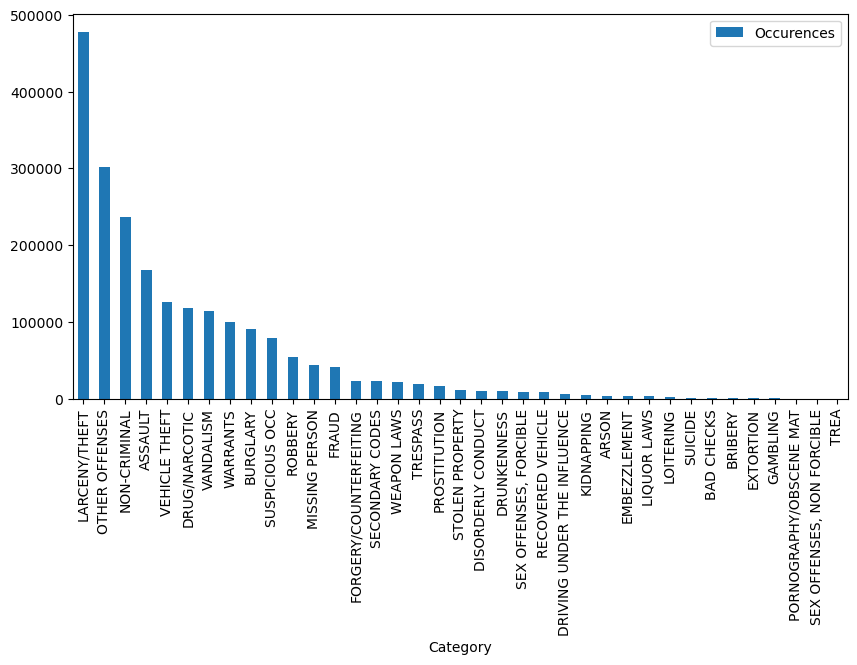

In [22]:
title = "Crime occurences by category"
df.plot.bar(x=CATEGORY_COL, y=OCCURENCE_COL, figsize=(10,5), title=title)

In [21]:
#categories = list(crimesByCategory.keys())
#values = list(crimesByCategory.values())
#plt.figure(figsize=(10, 5))
#plt.bar(names, values, align='center', width=0.7)
#plt.xticks(rotation='vertical')
#plt.xlabel("Categories")
#plt.ylabel("Occurrences")
#plt.title("Number of crimes per category")
#plt.show()

### Exercise 3

In [27]:
#for year in range(2003,2017):
data['Date'] = pd.to_datetime(data['Date'])
year = data[data['Date'].dt.year == 2003]
year

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
18,3071603916100,30716039,16100,DRUG/NARCOTIC,POSSESSION OF HEROIN,Thursday,2003-06-12,20:25,INGLESIDE,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,80.0
27,3044800006154,30448000,6154,LARCENY/THEFT,GRAND THEFT FROM PERSON,Friday,2003-01-24,19:00,RICHMOND,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0
30,3114963164070,31149631,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Monday,2003-09-29,16:15,MISSION,NOT PROSECUTED,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,83.0
34,4001254805013,40012548,5013,BURGLARY,"BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY",Friday,2003-12-19,10:30,NORTHERN,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,26.0
37,3146788116710,31467881,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,2003-12-18,00:01,TENDERLOIN,"ARREST, BOOKED",...,NaN,NaN,NaN,6.0,2.0,1.0,1.0,NaN,NaN,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013864,3012893971000,30128939,71000,NON-CRIMINAL,LOST PROPERTY,Thursday,2003-01-30,13:00,CENTRAL,NONE,...,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,20.0
2013873,3075809707041,30758097,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Tuesday,2003-06-24,13:30,BAYVIEW,NONE,...,NaN,NaN,22.0,14.0,1.0,NaN,NaN,NaN,NaN,55.0
2013896,3090743265016,30907432,65016,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,2003-08-01,10:30,MISSION,"ARREST, CITED",...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,53.0
2013900,3096879106244,30968791,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Saturday,2003-08-09,10:00,CENTRAL,NONE,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,99.0
